In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [19]:
os.getcwd()
#os.chdir('downloads/cab fare pred')

'/Users/asheesh.a/Downloads/cab fare pred'

In [20]:
train = pd.read_csv("train_cab.csv")

In [21]:
test=pd.read_csv("test.csv")

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [23]:
train.shape

(16067, 7)

In [24]:
test.shape

(9914, 6)

In [25]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [26]:
train.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [27]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [28]:
train = train.dropna(axis = 0,how='any')

In [29]:
train['fare_amount'].describe()

count     15988
unique      467
top         6.5
freq        757
Name: fare_amount, dtype: object

In [ ]:
train = train.drop(train.index[1075])

In [33]:
train['fare_amount']=pd.to_numeric(train['fare_amount'])

In [34]:
(train['fare_amount'] < 0).sum()

3

In [35]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)

In [36]:
train.loc[train['fare_amount']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10002,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.71396,1.0


In [37]:
#train = train.drop(train.index[1074])
train = train.drop(train[train['fare_amount']==0].index,axis=0)
train = train.drop(train[train['fare_amount']>500].index,axis=0)

In [38]:
train['fare_amount'].sort_values(ascending=False)

607      453.00
980      434.00
1335     180.00
1483     165.00
6630     128.83
14142    108.00
12349    104.67
12915     96.00
7810      95.00
9431      88.00
10077     87.30
12614     87.00
4620      85.50
14519     82.50
12437     80.75
2639      79.00
4013      77.70
13962     77.15
2013      77.00
6668      76.80
8363      76.00
10524     75.80
11019     75.33
13615     75.00
15023     73.30
1494      70.00
4118      69.70
649       66.30
9651      66.30
1709      65.50
          ...  
13221      2.50
7398       2.50
6632       2.50
10705      2.50
3558       2.50
14574      2.50
9621       2.50
472        2.50
1774       2.50
6002       2.50
657        2.50
6007       2.50
8680       2.50
8916       2.50
503        2.50
12178      2.50
14530      2.50
3427       2.50
6765       2.50
13877      2.50
12567      2.50
8263       2.50
8711       2.50
1750       2.50
15257      2.50
15370      2.50
4367       2.50
4954       2.50
1427       1.14
2780       0.01
Name: fare_amount, Lengt

In [39]:
train['passenger_count'].describe()

count    15981.000000
mean         2.623592
std         60.901659
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [40]:
train = train.drop(train[train['passenger_count']>6].index,axis=0)

In [41]:
train= train.drop(train[train['passenger_count']<1].index,axis=0)

In [42]:
train['pickup_latitude'].describe()

count    15904.000000
mean        39.921546
std          6.817033
min        -74.006893
25%         40.734944
50%         40.752636
75%         40.767382
max        401.083332
Name: pickup_latitude, dtype: float64

In [43]:
train[train['pickup_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [44]:
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1.0


In [45]:
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [46]:
train[train['dropoff_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [47]:
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [48]:
train['dropoff_longitude'].describe()

count    15903.000000
mean       -72.465339
std         10.566052
min        -74.429332
25%        -73.991181
50%        -73.980158
75%        -73.963643
max         40.802437
Name: dropoff_longitude, dtype: float64

In [49]:
train['pickup_longitude'].describe()

count    15903.000000
mean       -72.475081
std         10.538127
min        -74.438233
25%        -73.992143
50%        -73.981693
75%        -73.966808
max         40.766125
Name: pickup_longitude, dtype: float64

In [50]:
(train['pickup_latitude']==0).sum()

309

In [51]:
(train['dropoff_latitude']==0).sum()

308

In [52]:
(train['pickup_longitude']==0).sum()

309

In [53]:
(train['dropoff_longitude']==0).sum()

310

In [54]:
train = train.drop(train[train['dropoff_longitude']==0].index,axis=0)
train = train.drop(train[train['pickup_longitude']==0].index,axis=0)
train = train.drop(train[train['dropoff_latitude']==0].index,axis=0)
train = train.drop(train[train['pickup_latitude']==0].index,axis=0)

In [55]:
for i in (train[train['pickup_longitude']>0].index):
    n=train.loc[i,'pickup_longitude']
    train.loc[i,'pickup_longitude']=train.loc[i,'pickup_latitude']
    train.loc[i,'pickup_latitude']=n
    
    n=train.loc[i,'dropoff_longitude']
    train.loc[i,'dropoff_longitude']=train.loc[i,'dropoff_latitude']
    train.loc[i,'dropoff_latitude']=n

In [56]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15583 entries, 0 to 16065
Data columns (total 7 columns):
fare_amount          15583 non-null float64
pickup_datetime      15583 non-null object
pickup_longitude     15583 non-null float64
pickup_latitude      15583 non-null float64
dropoff_longitude    15583 non-null float64
dropoff_latitude     15583 non-null float64
passenger_count      15583 non-null float64
dtypes: float64(6), object(1)
memory usage: 1.6+ MB


In [ ]:
#train=train.droploc[train['pickup_datetime']=='43']
train = train.drop((train[train['pickup_datetime']=='43']).index,axis=0)

In [60]:
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [61]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [62]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [63]:
train['H_Distance'].head(10)

0     1.030764
1     8.450134
2     1.389525
3     2.799270
4     1.999157
5     3.787239
6     1.555807
7     4.155444
9     2.849627
10    1.374577
Name: H_Distance, dtype: float64

In [64]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [65]:
#train.head()
(train['passenger_count']==0).sum()

0

In [66]:
test.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323259,2015,1,27,1,13
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21
5,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.222549,2012,12,1,5,21
6,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.929601,2011,10,6,3,12
7,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.540102,2011,10,6,3,12
8,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.873962,2011,10,6,3,12
9,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.099794,2014,2,18,1,15


Text(0, 0.5, 'Frequency')

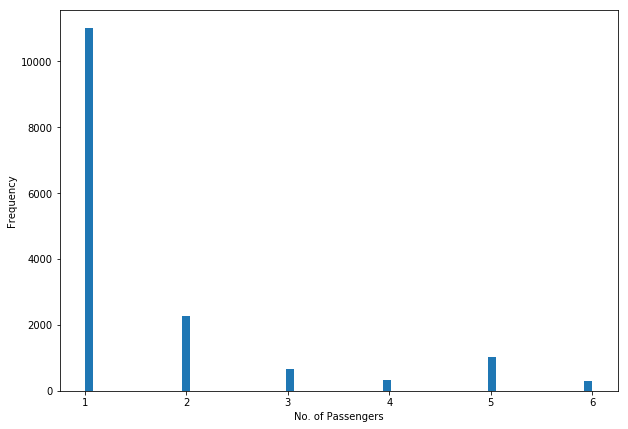

In [67]:
plt.figure(figsize=(10,7))
plt.hist(train['passenger_count'], bins='auto')
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

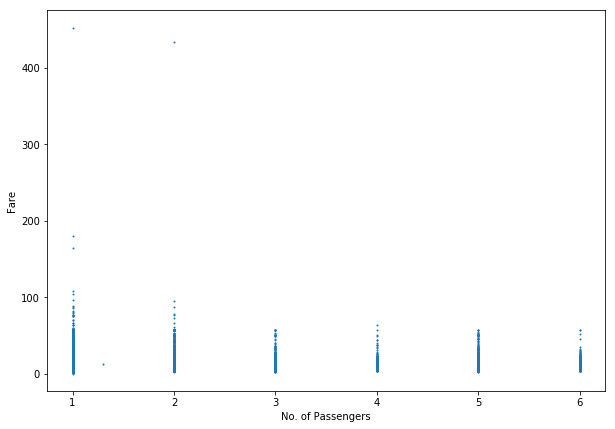

In [68]:
plt.figure(figsize=(10,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

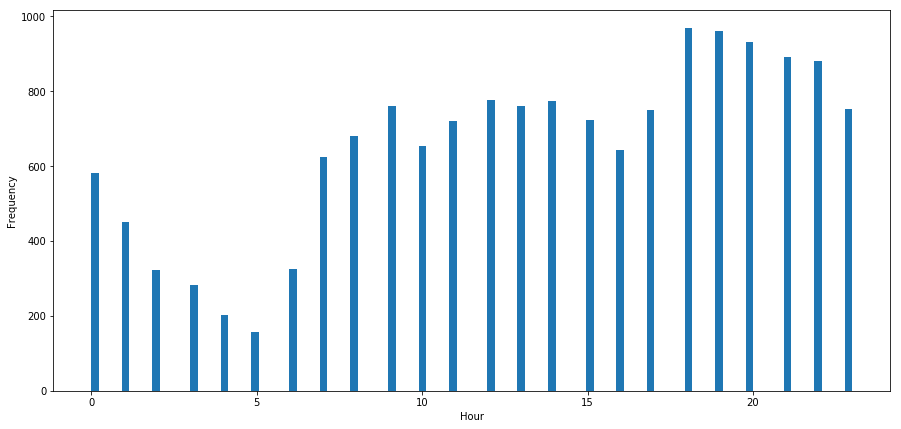

In [69]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

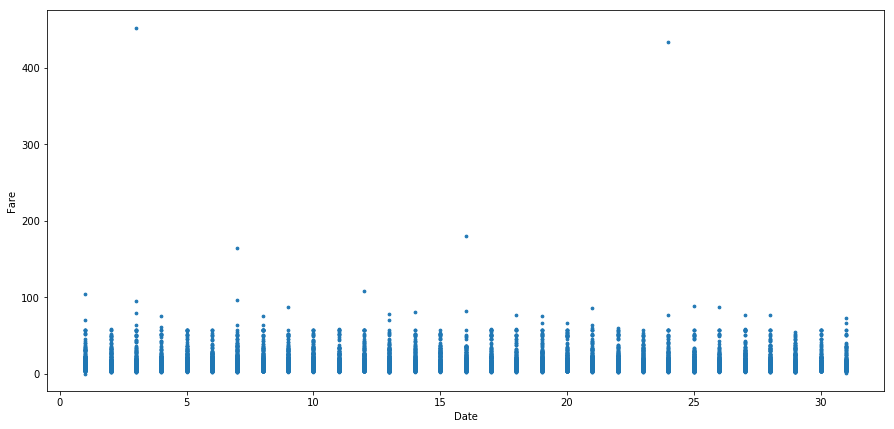

In [70]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=7.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

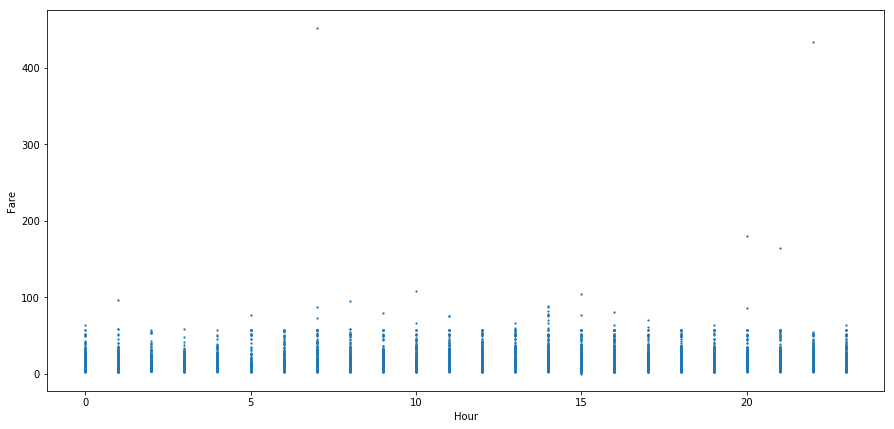

In [71]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

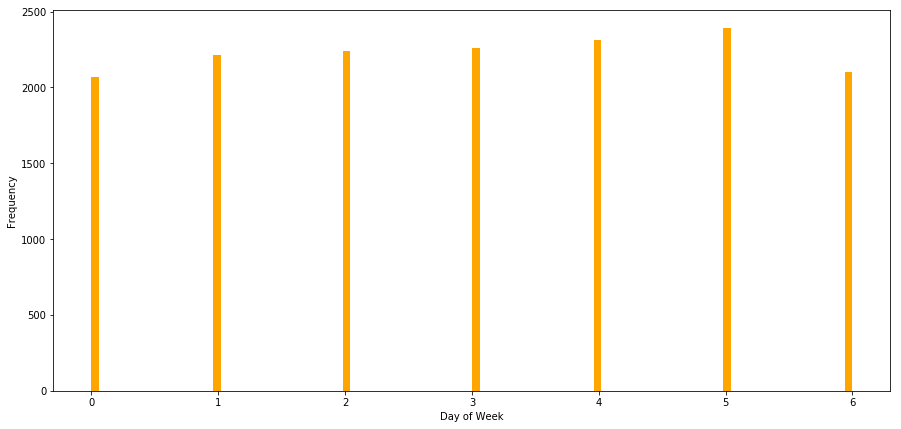

In [72]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100,color='orange')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

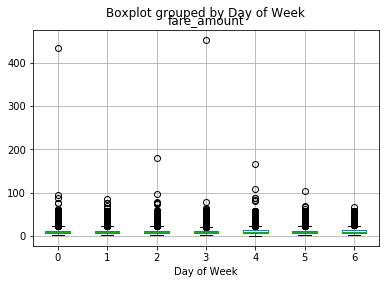

In [73]:
# plt.figure(figsize=(15,7))
#plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
#plt.xlabel('Day of Week')
#plt.ylabel('Fare')
train.boxplot(by='Day of Week', column=['fare_amount'])

# cleaning contd

In [74]:
train['fare_amount'].describe()

count    15582.000000
mean        11.368597
std         10.793042
min          0.010000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [75]:
train=train.drop(train[train['fare_amount']>200].index,axis=0)

In [76]:
train['H_Distance'].describe()

count    15580.000000
mean         4.041392
std         56.321314
min          0.000000
25%          1.257423
50%          2.171757
75%          3.902116
max       5420.988959
Name: H_Distance, dtype: float64

In [77]:
train=train.drop(train[train['H_Distance']==0].index,axis=0)

In [78]:
train.shape

(15425, 13)

In [79]:
train = train.drop(train[train['H_Distance']>200].index,axis=0)

# cleaning contd end

Text(0.5, 1.0, 'Distribution of Trip Fare')

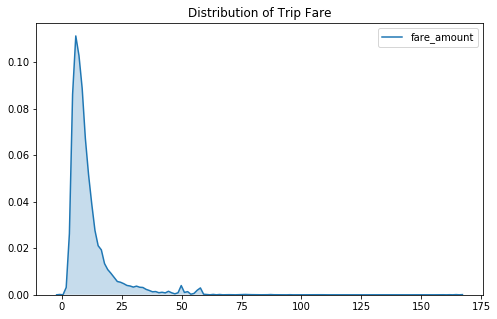

In [80]:
plt.figure(figsize=(8,5))
sns.kdeplot(train['fare_amount'],shade='true').set_title("Distribution of Trip Fare")

Text(0.5, 1.0, 'Distribution of fare amount (log scale)')

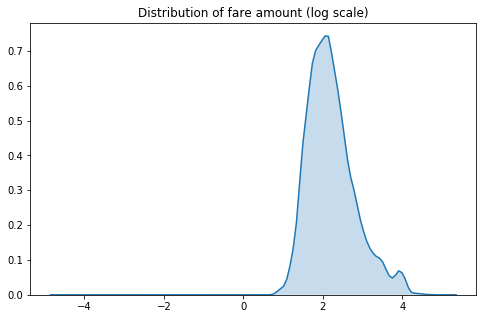

In [81]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(train['fare_amount'].values),shade='true').set_title("Distribution of fare amount (log scale)")

In [88]:
#train=train.drop('pickup_datetime',axis=1)
train.info()
test=test.drop('pickup_datetime',axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15423 entries, 0 to 16065
Data columns (total 12 columns):
fare_amount          15423 non-null float64
pickup_longitude     15423 non-null float64
pickup_latitude      15423 non-null float64
dropoff_longitude    15423 non-null float64
dropoff_latitude     15423 non-null float64
passenger_count      15423 non-null float64
H_Distance           15423 non-null float64
Year                 15423 non-null int64
Month                15423 non-null int64
Date                 15423 non-null int64
Day of Week          15423 non-null int64
Hour                 15423 non-null int64
dtypes: float64(7), int64(5)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
H_D

# Model Development 

In [83]:
from sklearn.model_selection import train_test_split
y = train['fare_amount']
X = train.drop(columns=['fare_amount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5) #Test RMSE: 6.530
print(mean_absolute_error(y_test, y_pred, multioutput='raw_values')) #[3.29355937]

Test RMSE: 5.312
[3.30063603]


In [84]:
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.tree import DecisionTreeRegressor

#Decision tree for regression-
DT_model= DecisionTreeRegressor().fit(X_train,y_train)

#model prediction on train data-
y_pred= DT_model.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5) #Test RMSE: 6.508
print(mean_absolute_error(y_test, y_pred, multioutput='raw_values'))  #[2.89551784]

Test RMSE: 6.435
[2.77768965]


In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)  #Test RMSE: 4.929
print(mean_absolute_error(y_test, y_pred, multioutput='raw_values'))  #[2.89535121]

Test RMSE: 4.335
[2.78878588]


In [89]:
test['fare_amount']=rf.predict(test)

In [95]:
test.to_csv('CabFarePythonPredictions.csv')